In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
font_name = 'Hiragino Sans'

In [6]:
try:
    # 1. 'shift_jis' で読み込みを試す
    df = pd.read_csv('stats_bat.csv', encoding='shift_jis')
    print("Shift JISで読み込みに成功しました。")
    print(df.head())
    
except UnicodeDecodeError:
    # 2. 'shift_jis' で失敗した場合、拡張型である 'cp932' を試す
    try:
        df = pd.read_csv('stats_bat.csv', encoding='cp932')
        print("cp932で読み込みに成功しました。")
        print(df.head())
    except UnicodeDecodeError:
        print("どちらのエンコーディングでも読み込めませんでした。")

cp932で読み込みに成功しました。
   season_year  team_league_id team_league_name  team_id team_name  player_id  \
0         2021               1            セ・リーグ        1        巨人      12000   
1         2021               1            セ・リーグ        1        巨人      12179   
2         2021               1            セ・リーグ        1        巨人     500037   
3         2021               1            セ・リーグ        1        巨人     600008   
4         2021               1            セ・リーグ        1        巨人     600026   

  player_name   g  gs   pa  ...  hbp  ibb  sh  sf  so  gidp  sb  cs  e  pb  
0       中島　宏之  81  41  195  ...    3    1   1   1  35     9   0   0  0   0  
1        大竹　寛   4   0    0  ...    0    0   0   0   0     0   0   0  0   0  
2       亀井　善行  92  38  206  ...    2    1   2   3  47     3   1   1  0   0  
3        山口　俊  15  15   23  ...    0    0   0   0  14     3   0   0  3   0  
4      炭谷　銀仁朗  44  18   54  ...    0    1   1   1  17     0   0   0  0   1  

[5 rows x 30 columns]


In [3]:
filtered_df = df[
    (df['pa'] >= 200) & (df['team_league_id'] == 2)
].copy()
print(filtered_df.head())

     season_year  team_league_id team_league_name  team_id team_name  \
339         2021               2            パ・リーグ        7        西武   
340         2021               2            パ・リーグ        7        西武   
350         2021               2            パ・リーグ        7        西武   
351         2021               2            パ・リーグ        7        西武   
352         2021               2            パ・リーグ        7        西武   

     player_id player_name    g   gs   pa  ...  hbp  ibb  sh  sf   so  gidp  \
339      12101       中村　剛也  123  115  475  ...    2    3   0   4  114    12   
340      12102        栗山　巧  117  110  446  ...    3    1   0   7   58    11   
350    1200083       金子　侑司  101   54  220  ...    2    0   6   2   39     7   
351    1300100        森　友哉  125  122  520  ...    6    3   1   3   65     4   
352    1300101       山川　穂高  110  106  414  ...    7    0   0   6  101     7   

     sb  cs  e  pb  
339   0   0  3   0  
340   1   0  0   0  
350   9   9  0   0  
351   5 

In [4]:
filtered_df['HR_Rate'] = filtered_df.hr / (filtered_df.pa + df.bb + df.hbp)
print(filtered_df['HR_Rate'])

339     0.034884
340     0.008032
350     0.000000
351     0.018182
352     0.051724
          ...   
3492    0.006237
3493    0.002513
3494    0.010526
3499    0.011765
3501    0.018692
Name: HR_Rate, Length: 318, dtype: float64


In [5]:
filtered_df['ball_Rate'] = (df.bb + df.hbp) / (filtered_df.pa + df.bb + df.hbp)
print(filtered_df['ball_Rate'])

339     0.079457
340     0.104418
350     0.059829
351     0.140496
352     0.107759
          ...   
3492    0.043659
3493    0.103015
3494    0.097368
3499    0.037255
3501    0.028037
Name: ball_Rate, Length: 318, dtype: float64


In [6]:
result = []
result.append(filtered_df['HR_Rate'])
result.append(filtered_df['ball_Rate'])
result.append(filtered_df['player_name'])
result_df = pd.DataFrame({
    'HR_Rate': filtered_df['HR_Rate'],
    'ball_Rate': filtered_df['ball_Rate'],
    'player_name': filtered_df['player_name']
})
print(result_df)

       HR_Rate  ball_Rate player_name
339   0.034884   0.079457       中村　剛也
340   0.008032   0.104418        栗山　巧
350   0.000000   0.059829       金子　侑司
351   0.018182   0.140496        森　友哉
352   0.051724   0.107759       山川　穂高
...        ...        ...         ...
3492  0.006237   0.043659        宗山　塁
3493  0.002513   0.103015      小深田　大翔
3494  0.010526   0.097368       黒川　史陽
3499  0.011765   0.037255       中島　大輔
3501  0.018692   0.028037       ゴンザレス

[318 rows x 3 columns]


In [7]:
average_ball_rate = filtered_df['HR_Rate'].mean()
if (filtered_df['HR_Rate']  >  average_ball_rate * 1.5).any:
    print("外れ値があります")
else:
    print("外れ値はありません")

外れ値があります


In [8]:
average_ball_rate = filtered_df['ball_Rate'].mean()
if (filtered_df['ball_Rate']  >  average_ball_rate * 1.5).any:
    print("外れ値があります")
else:
    print("外れ値はありません")

外れ値があります


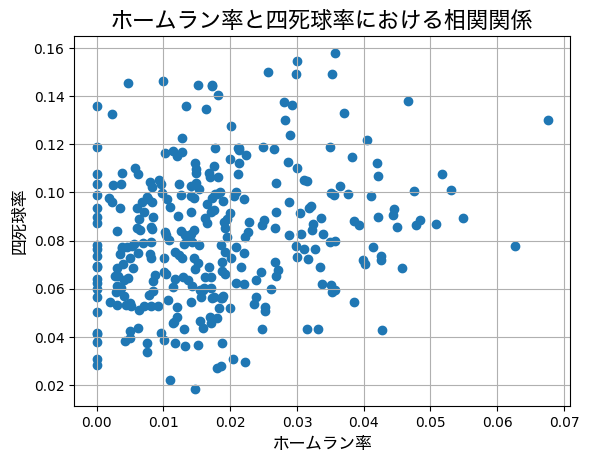

In [9]:
# フォントプロパティを作成
x = filtered_df['HR_Rate']
y = filtered_df['ball_Rate']
font_prop = fm.FontProperties(fname=fm.findfont(font_name))
plt.scatter(x,y)
plt.title('ホームラン率と四死球率における相関関係',fontproperties=font_prop, fontsize=16)
plt.xlabel('ホームラン率',fontproperties=font_prop, fontsize=12)
plt.ylabel('四死球率',fontproperties=font_prop, fontsize=12)
plt.grid(True)
plt.show()

In [10]:
import plotly.express as px
# 相関図（散布図）を作成
fig = px.scatter(
    result_df, 
    x='ball_Rate',      # X軸のデータ
    y='HR_Rate',        # Y軸のデータ
    hover_name='player_name', # カーソルを合わせたときに大きく表示されるデータ（主キー）
    hover_data={
        'HR_Rate': ':.3f',  # HR_Rateを小数点以下3桁で表示
        'ball_Rate': ':.3f', # ball_Rateを小数点以下3桁で表示
        'player_name': True  # player_nameもツールチップに含める
    },
    title='ホームラン率と四球率の相関図'
)

# グラフをブラウザまたはJupyter/Colabに出力
fig.show()